In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data_train = pd.read_csv('sample_data/train.csv')
data_test = pd.read_csv('sample_data/test.csv')

# 1- Vizualização e tratamento de dados

In [ ]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
data_train.drop(['Cabin'], axis=1, inplace=True)

In [ ]:
data_train['Age'].fillna(data_train['Age'].median(), inplace=True)
data_train['Embarked'].fillna(data_train['Embarked'].mode()[0], inplace=True)

In [ ]:
data_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
data_train['Sex'] = data_train['Sex'].map({'male': 0, 'female': 1})
data_train['Embarked'] = data_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [ ]:
x = data_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data_train['Survived']

In [ ]:
x, y

(     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
 0         3    0  22.0      1      0   7.2500         0
 1         1    1  38.0      1      0  71.2833         1
 2         3    1  26.0      0      0   7.9250         0
 3         1    1  35.0      1      0  53.1000         0
 4         3    0  35.0      0      0   8.0500         0
 ..      ...  ...   ...    ...    ...      ...       ...
 886       2    0  27.0      0      0  13.0000         0
 887       1    1  19.0      0      0  30.0000         0
 888       3    1  28.0      1      2  23.4500         0
 889       1    0  26.0      0      0  30.0000         1
 890       3    0  32.0      0      0   7.7500         2
 
 [891 rows x 7 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [ ]:
data_train.shape

(891, 11)

In [ ]:
x_train.shape

(623, 7)

In [ ]:
x_test.shape

(268, 7)



---



# 1.1 Salvando os dados ja tratados

In [ ]:
import pickle

In [ ]:
with open('sample_data/titanic_data_ready.pkl', mode = 'wb') as f:
  pickle.dump([x_train, x_test, y_train, y_test], f)



---



# 2- Preparação para csv de teste

In [ ]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
data_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [ ]:
data_test.drop(['Cabin'], axis=1, inplace=True)
data_test['Age'].fillna(data_test['Age'].median(), inplace=True)
data_test['Fare'].fillna(data_test['Fare'].median(), inplace=True)

In [ ]:
data_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [ ]:
data_test['Sex'] = data_test['Sex'].map({'male': 0, 'female': 1})
data_test['Embarked'] = data_test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

x_test_csv = data_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

---


# 2.1 Salvando os dados de teste ja tratados

In [505]:
pd.to_pickle(x_test_csv, 'sample_data/titanic_data_test_ready.pkl')



---



# 3- Treinando Modelos e testando o csv para cada modelo

## Naive

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive_model = GaussianNB()
naive_model.fit(x_train, y_train)

y_naive_pred = naive_model.predict(x_test)

### Teste do csv

In [ ]:
test_prediction_naive = naive_model.predict(x_test_csv)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(x_train, y_train)

y_random_forest_pred = random_forest_model.predict(x_test)

### Teste do csv

In [ ]:
test_prediction_random_forest = random_forest_model.predict(x_test_csv)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(x_train, y_train)

y_tree_pred = tree_model.predict(x_test)

### Teste do csv

In [ ]:
test_prediction_tree = tree_model.predict(x_test_csv)

---


# 4- Matriz de confusão e acuracia de cada modelo

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

### Random Forest

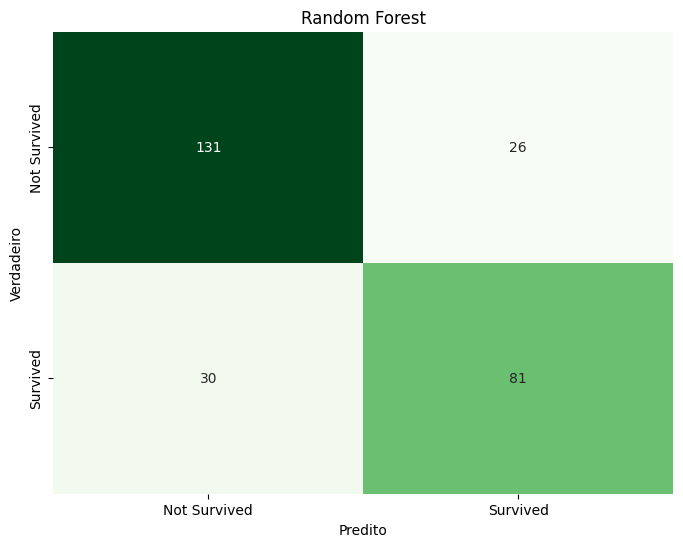

In [ ]:
cmR = confusion_matrix(y_test, y_random_forest_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cmR, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])

plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Random Forest')
plt.show()

In [ ]:
print(classification_report(y_test, y_random_forest_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       157
           1       0.76      0.73      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



### Naive

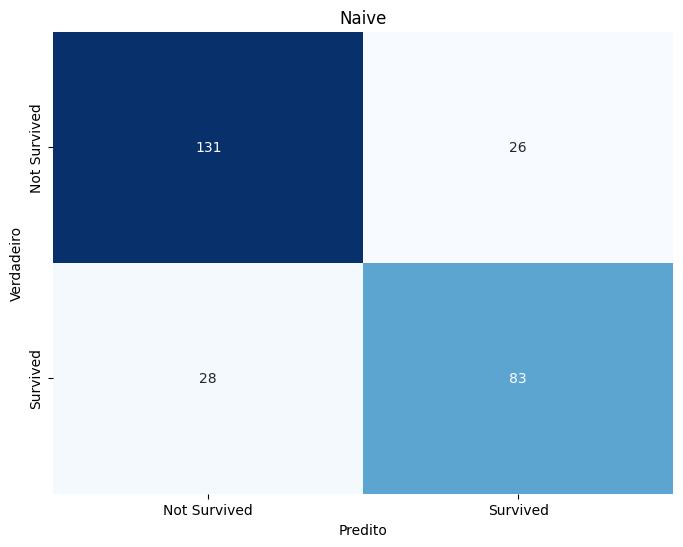

In [ ]:
cmN = confusion_matrix(y_test, y_naive_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cmN, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])

plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Naive')
plt.show()

In [ ]:
print(classification_report(y_test, y_naive_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       157
           1       0.76      0.75      0.75       111

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



### Tree

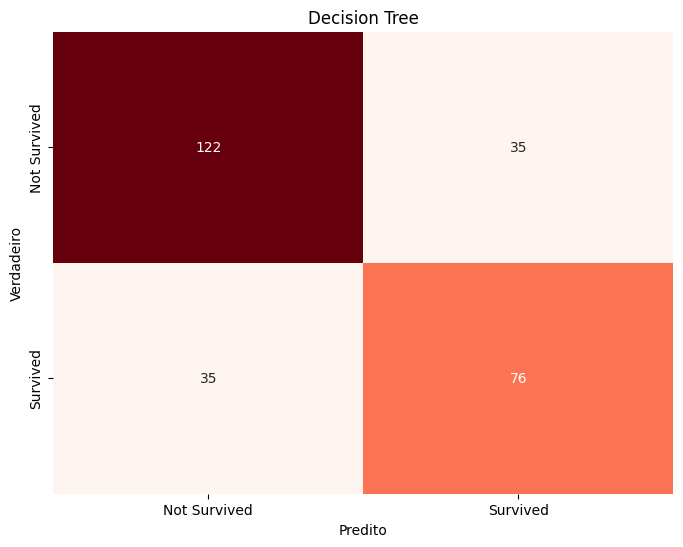

In [ ]:
cmT = confusion_matrix(y_test, y_tree_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cmT, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])

plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Decision Tree')
plt.show()

In [ ]:
print(classification_report(y_test, y_tree_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       157
           1       0.68      0.68      0.68       111

    accuracy                           0.74       268
   macro avg       0.73      0.73      0.73       268
weighted avg       0.74      0.74      0.74       268



---


# 5- Comparação da acuracia de cada modelo pelo treino

In [ ]:
from sklearn.metrics import accuracy_score

### Calculando a acurancia de cada modelo

In [ ]:
accuracy_rf = accuracy_score(y_test, y_random_forest_pred)
accuracy_naive = accuracy_score(y_test, y_naive_pred)
accuracy_tree = accuracy_score(y_test, y_tree_pred)

In [ ]:
accuracies = [accuracy_rf, accuracy_naive, accuracy_tree]
model_names = ['Random Forest', 'Naive Bayes', 'Árvore de Decisão']

### Criando gráfico de baras

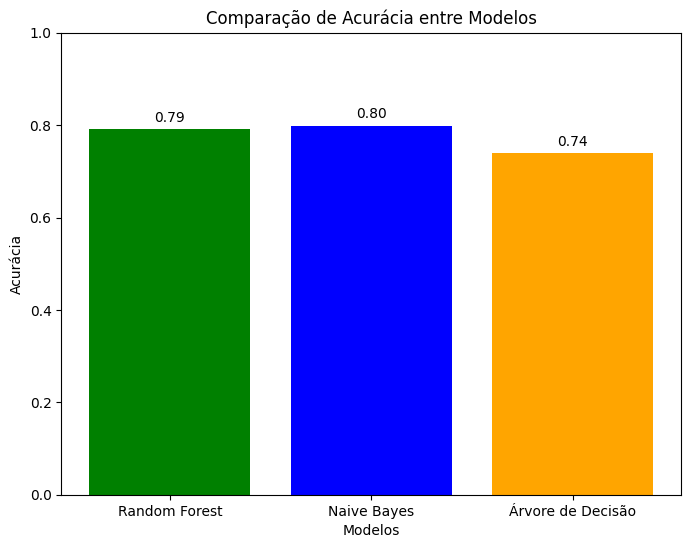

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['green', 'blue', 'orange'])

plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia entre Modelos')

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom')

plt.ylim([0, 1])  # Definir limites do eixo y para facilitar a leitura
plt.show()

---


# 6- Testando a acuracia de cada modelo para o csv de teste

In [ ]:
result = pd.read_csv('sample_data/gender_submission.csv')
result = result['Survived']

## Confirindo tamanho do resultados dos modelos em relação aos modelos

In [ ]:
result.shape

(418,)

In [ ]:
test_prediction_random_forest.shape

(418,)

In [ ]:
test_prediction_naive.shape

(418,)

In [ ]:
test_prediction_tree.shape

(418,)

## Acurancia dos testes do arquivo csv

In [ ]:
accuracy_rf_csv = accuracy_score(result, test_prediction_random_forest)
accuracy_naive_csv = accuracy_score(result, test_prediction_naive)
accuracy_tree_csv = accuracy_score(result, test_prediction_tree)

In [ ]:
accuracies_csv = [accuracy_rf_csv, accuracy_naive_csv, accuracy_tree_csv]
model_names = ['Random Forest', 'Naive Bayes', 'Árvore de Decisão']

## Montando o grafico das acuracias

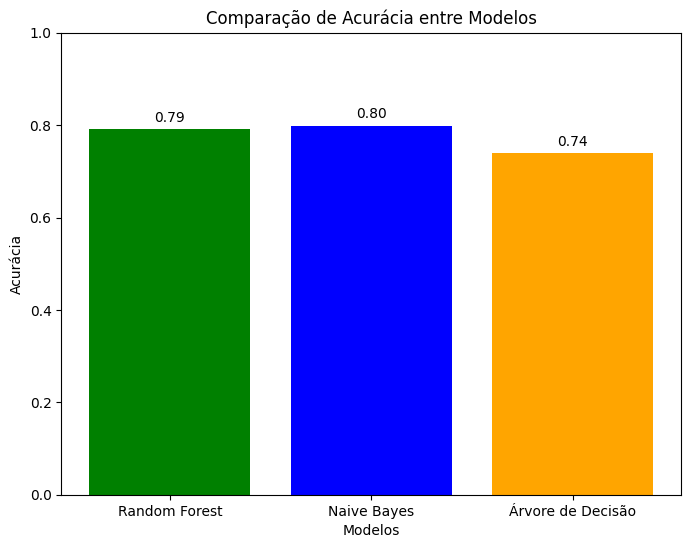

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['green', 'blue', 'orange'])

plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia entre Modelos')

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom')

plt.ylim([0, 1])  # Definir limites do eixo y para facilitar a leitura
plt.show()

---
